# Explore here

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
#Guardo csv en carpeta de destino
df.to_csv('../data/raw/df_NYC_airbnb.csv', index=False)

In [3]:
df.shape

(48895, 16)

In [4]:
#Despliego toda la informacion relevante del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Paso 2: Exploración y limpieza de datos
#Eliminar duplicados 

print(df['name'].duplicated().sum())
print(df['host_id'].duplicated().sum())
print(df['id'].duplicated().sum())

989
11438
0


In [6]:
df[df['name'].duplicated()].sort_values(['name'],ascending=True)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
34352,27237625,*NO GUEST SERVICE FEE* Luxury Midtown One Bedr...,205031545,Red Awning,Manhattan,Midtown,40.75459,-73.96707,Entire home/apt,737,3,3,2019-06-10,0.44,49,153
42817,33241978,1 BR Suite in Midtown Manhattan,24831061,Hosteeva,Manhattan,Midtown,40.76391,-73.98071,Private room,250,1,0,NaN,NaN,8,0
9250,7071657,1 BR UPPER EAST SIDE,4909308,Francesco,Manhattan,Upper East Side,40.77344,-73.95035,Entire home/apt,243,1,26,2019-06-22,1.10,1,149
37235,29587811,1 Bedroom in Williamsburg,162504107,Lucile,Brooklyn,Williamsburg,40.71526,-73.94987,Private room,90,2,2,2019-05-19,0.33,1,193
32000,24976971,1 bedroom apartment on Columbus Avenue,76104209,Rated,Manhattan,Upper West Side,40.79360,-73.96642,Entire home/apt,180,30,0,NaN,NaN,33,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13401,10052289,NaN,49522403,Vanessa,Brooklyn,Brownsville,40.66409,-73.92314,Private room,50,3,3,2016-08-18,0.07,1,362
15819,12797684,NaN,69715276,Yan,Manhattan,Upper West Side,40.79843,-73.96404,Private room,100,1,0,NaN,NaN,2,0
16071,12988898,NaN,71552588,Andrea,Bronx,Fordham,40.86032,-73.88493,Shared room,130,1,0,NaN,NaN,1,365
18047,14135050,NaN,85288337,Jeff,Brooklyn,Bedford-Stuyvesant,40.69421,-73.93234,Private room,70,3,0,NaN,NaN,1,0


In [7]:
#Eliminar informacion irrelevante
 
df.drop(['id','name','host_id','host_name','last_review','reviews_per_month'],axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


<Axes: xlabel='availability_365', ylabel='Count'>

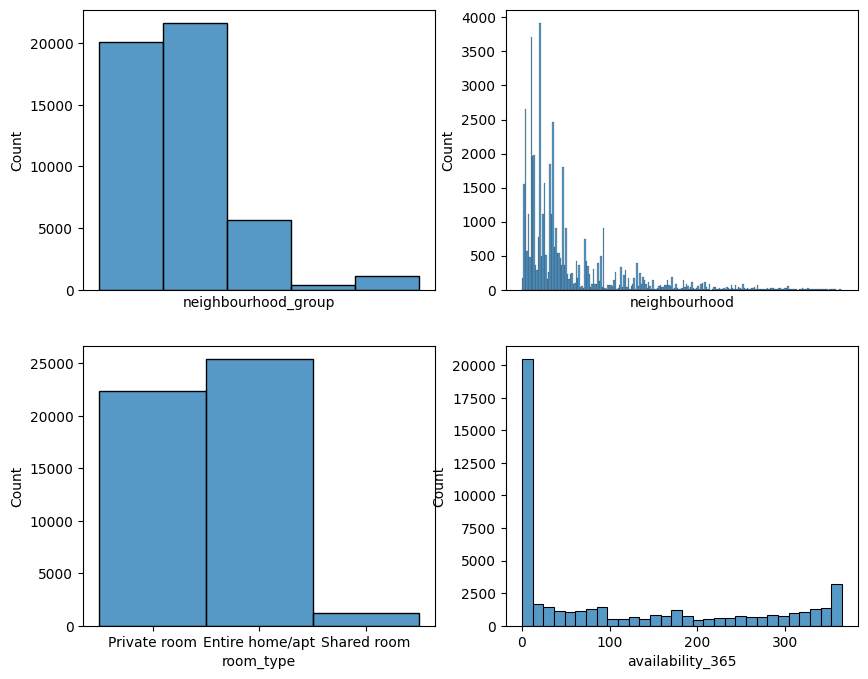

In [8]:
#Paso 3 analisis de variables univariante
#Aqui se da realiza analisis a variables numericas y categoricas

import matplotlib.pyplot as plt
import seaborn as sns

fig,axis = plt.subplots(2,2,figsize=(10,8))

sns.histplot(ax=axis[0,0],data=df,x='neighbourhood_group').set_xticks([])
sns.histplot(ax=axis[0,1],data=df,x='neighbourhood').set_xticks([])
sns.histplot(ax=axis[1,0],data=df,x='room_type')
sns.histplot(ax=axis[1,1],data=df,x='availability_365')

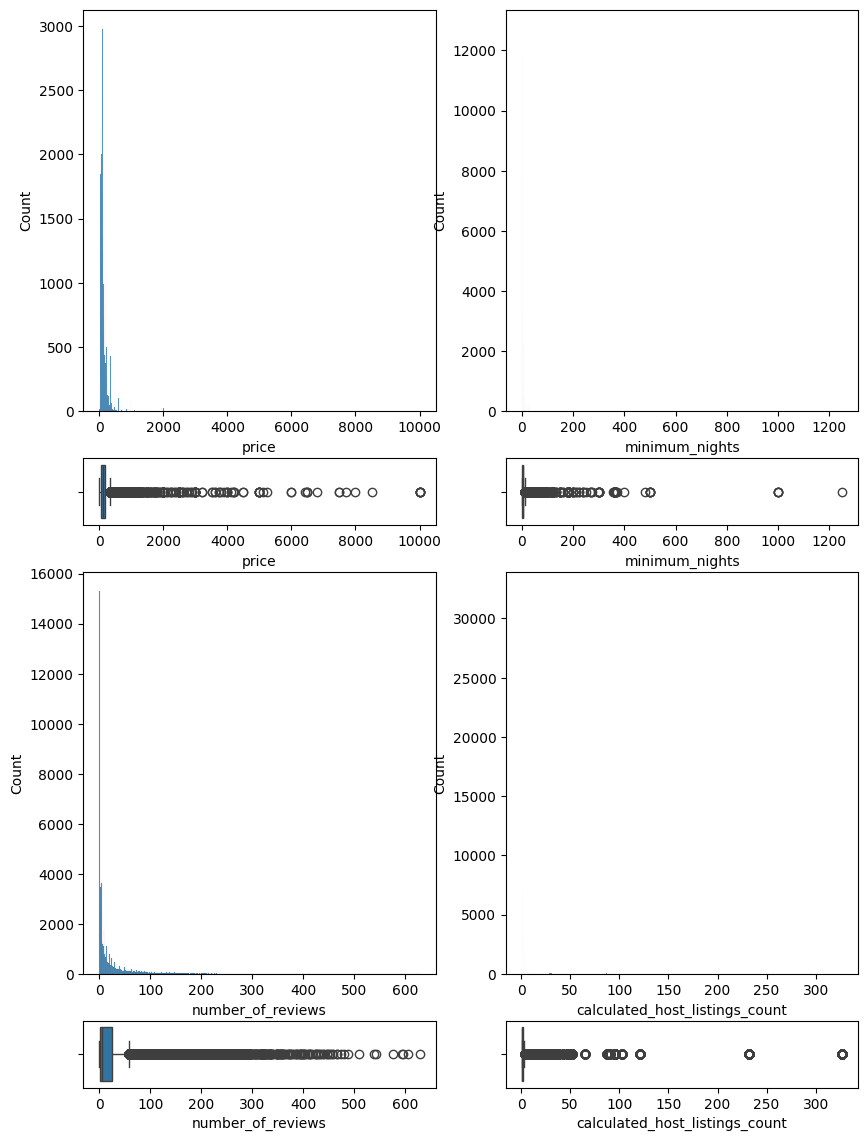

In [9]:
fig,axis = plt.subplots(4,2,figsize=(10,14),gridspec_kw={"height_ratios":[6,1,6,1]})

sns.histplot(ax=axis[0,0],data=df,x='price')
sns.boxplot(ax=axis[1,0],data=df,x='price')

sns.histplot(ax=axis[0,1],data=df,x='minimum_nights')
sns.boxplot(ax=axis[1,1],data=df,x='minimum_nights')

sns.histplot(ax=axis[2,0],data=df,x='number_of_reviews')
sns.boxplot(ax=axis[3,0],data=df,x='number_of_reviews')

sns.histplot(ax=axis[2,1],data=df,x='calculated_host_listings_count')
sns.boxplot(ax=axis[3,1],data=df,x='calculated_host_listings_count')

plt.show()

<Axes: >

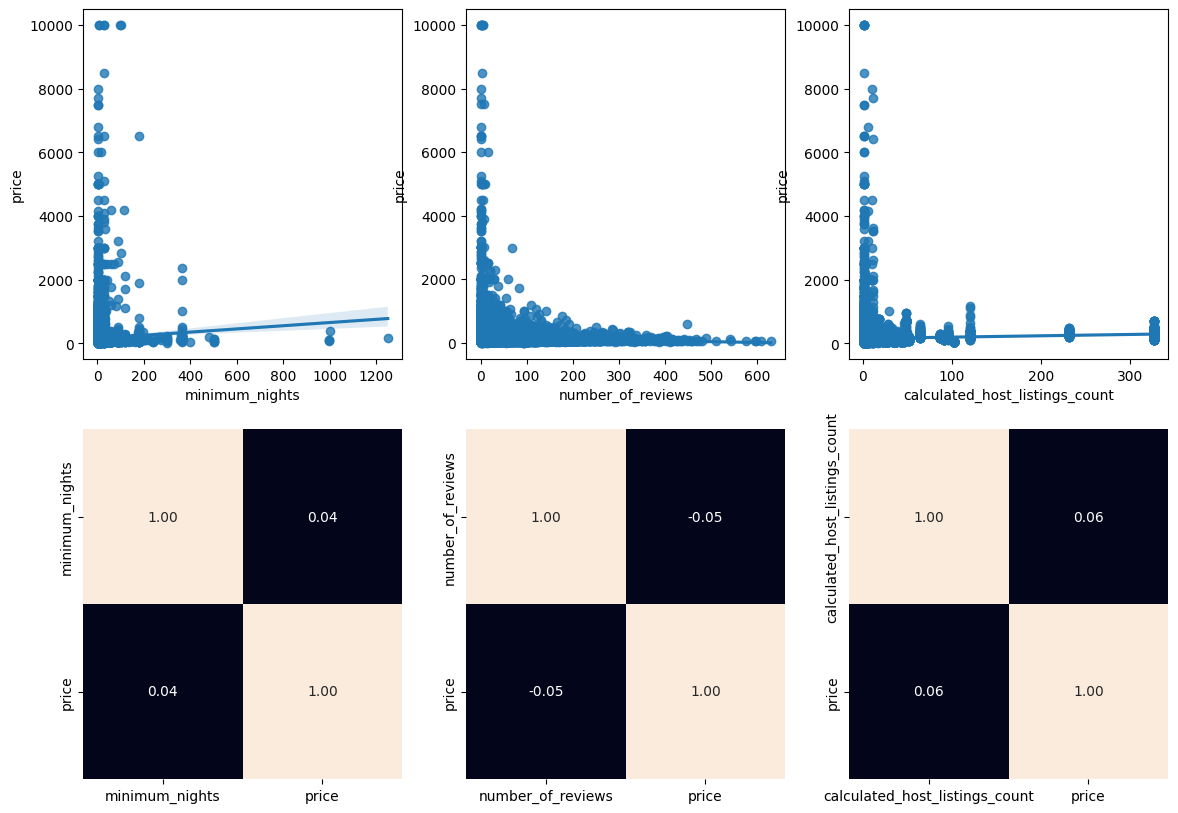

In [10]:
#Paso 4 analisis de variables multivariante
#Comenzamos por el analisis numerico-numerico dado que es el mas facil.
#Se realiza en base a la variable a predecir con las demas numericas

fig,axis = plt.subplots(2,3,figsize=(14,10))

sns.regplot(ax=axis[0,0],data=df,x='minimum_nights',y='price')
sns.heatmap(df[['minimum_nights','price']].corr(),fmt='.2f',ax=axis[1,0],cbar=False,annot=True)

sns.regplot(ax=axis[0,1],data=df,x='number_of_reviews',y='price')
sns.heatmap(df[['number_of_reviews','price']].corr(),fmt='.2f',ax=axis[1,1],cbar=False,annot=True)

sns.regplot(ax=axis[0,2],data=df,x='calculated_host_listings_count',y='price')
sns.heatmap(df[['calculated_host_listings_count','price']].corr(),fmt='.2f',ax=axis[1,2],cbar=False,annot=True)

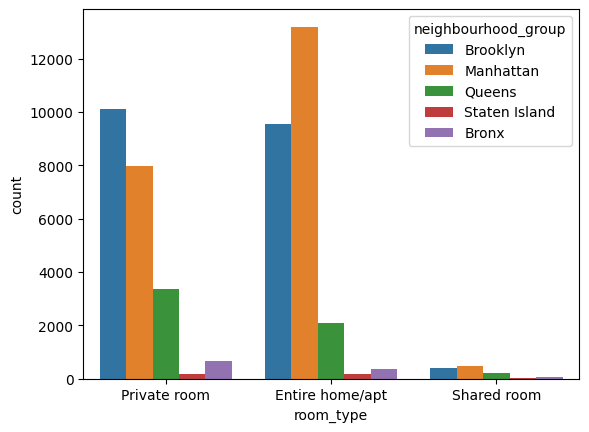

In [11]:
#Analisis categorico-categorico
#se representan con histogramas

sns.countplot(data=df,x='room_type', hue='neighbourhood_group')
plt.show()

In [12]:
df['percentil_precio']=pd.qcut(df['price'], 5)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,percentil_precio
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,"(130.0, 200.0]"
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,"(200.0, 10000.0]"
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,"(130.0, 200.0]"
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,"(60.0, 90.0]"
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,"(60.0, 90.0]"


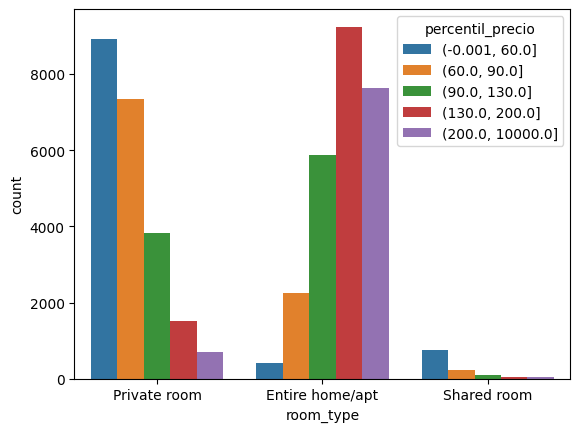

In [13]:
sns.countplot(data=df,x='room_type', hue='percentil_precio')
plt.show()

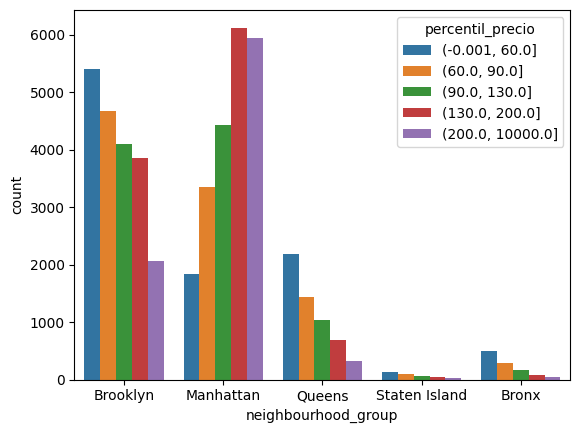

In [14]:
sns.countplot(data=df,x='neighbourhood_group', hue='percentil_precio')
plt.show()

In [15]:
df.drop('percentil_precio',axis=1,inplace=True)


In [16]:
df['room_type'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0]
df['neighbourhood'] = pd.factorize(df['neighbourhood'])[0]

In [17]:
df.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,0,40.64749,-73.97237,0,149,1,9,6,365
1,1,1,40.75362,-73.98377,1,225,1,45,2,355
2,1,2,40.80902,-73.94190,0,150,3,0,1,365
3,0,3,40.68514,-73.95976,1,89,1,270,1,194
4,1,4,40.79851,-73.94399,1,80,10,9,1,0


In [18]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

<Axes: >

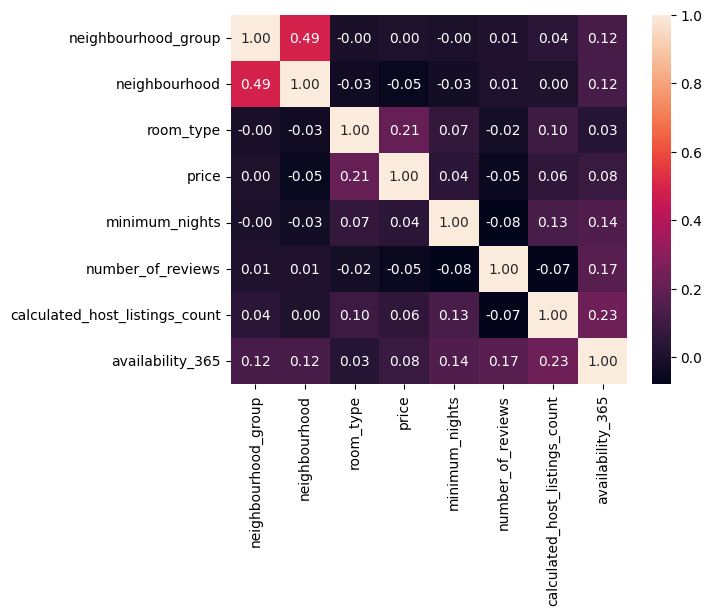

In [19]:
sns.heatmap(df[['neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']].corr(),annot=True,fmt='.2f')

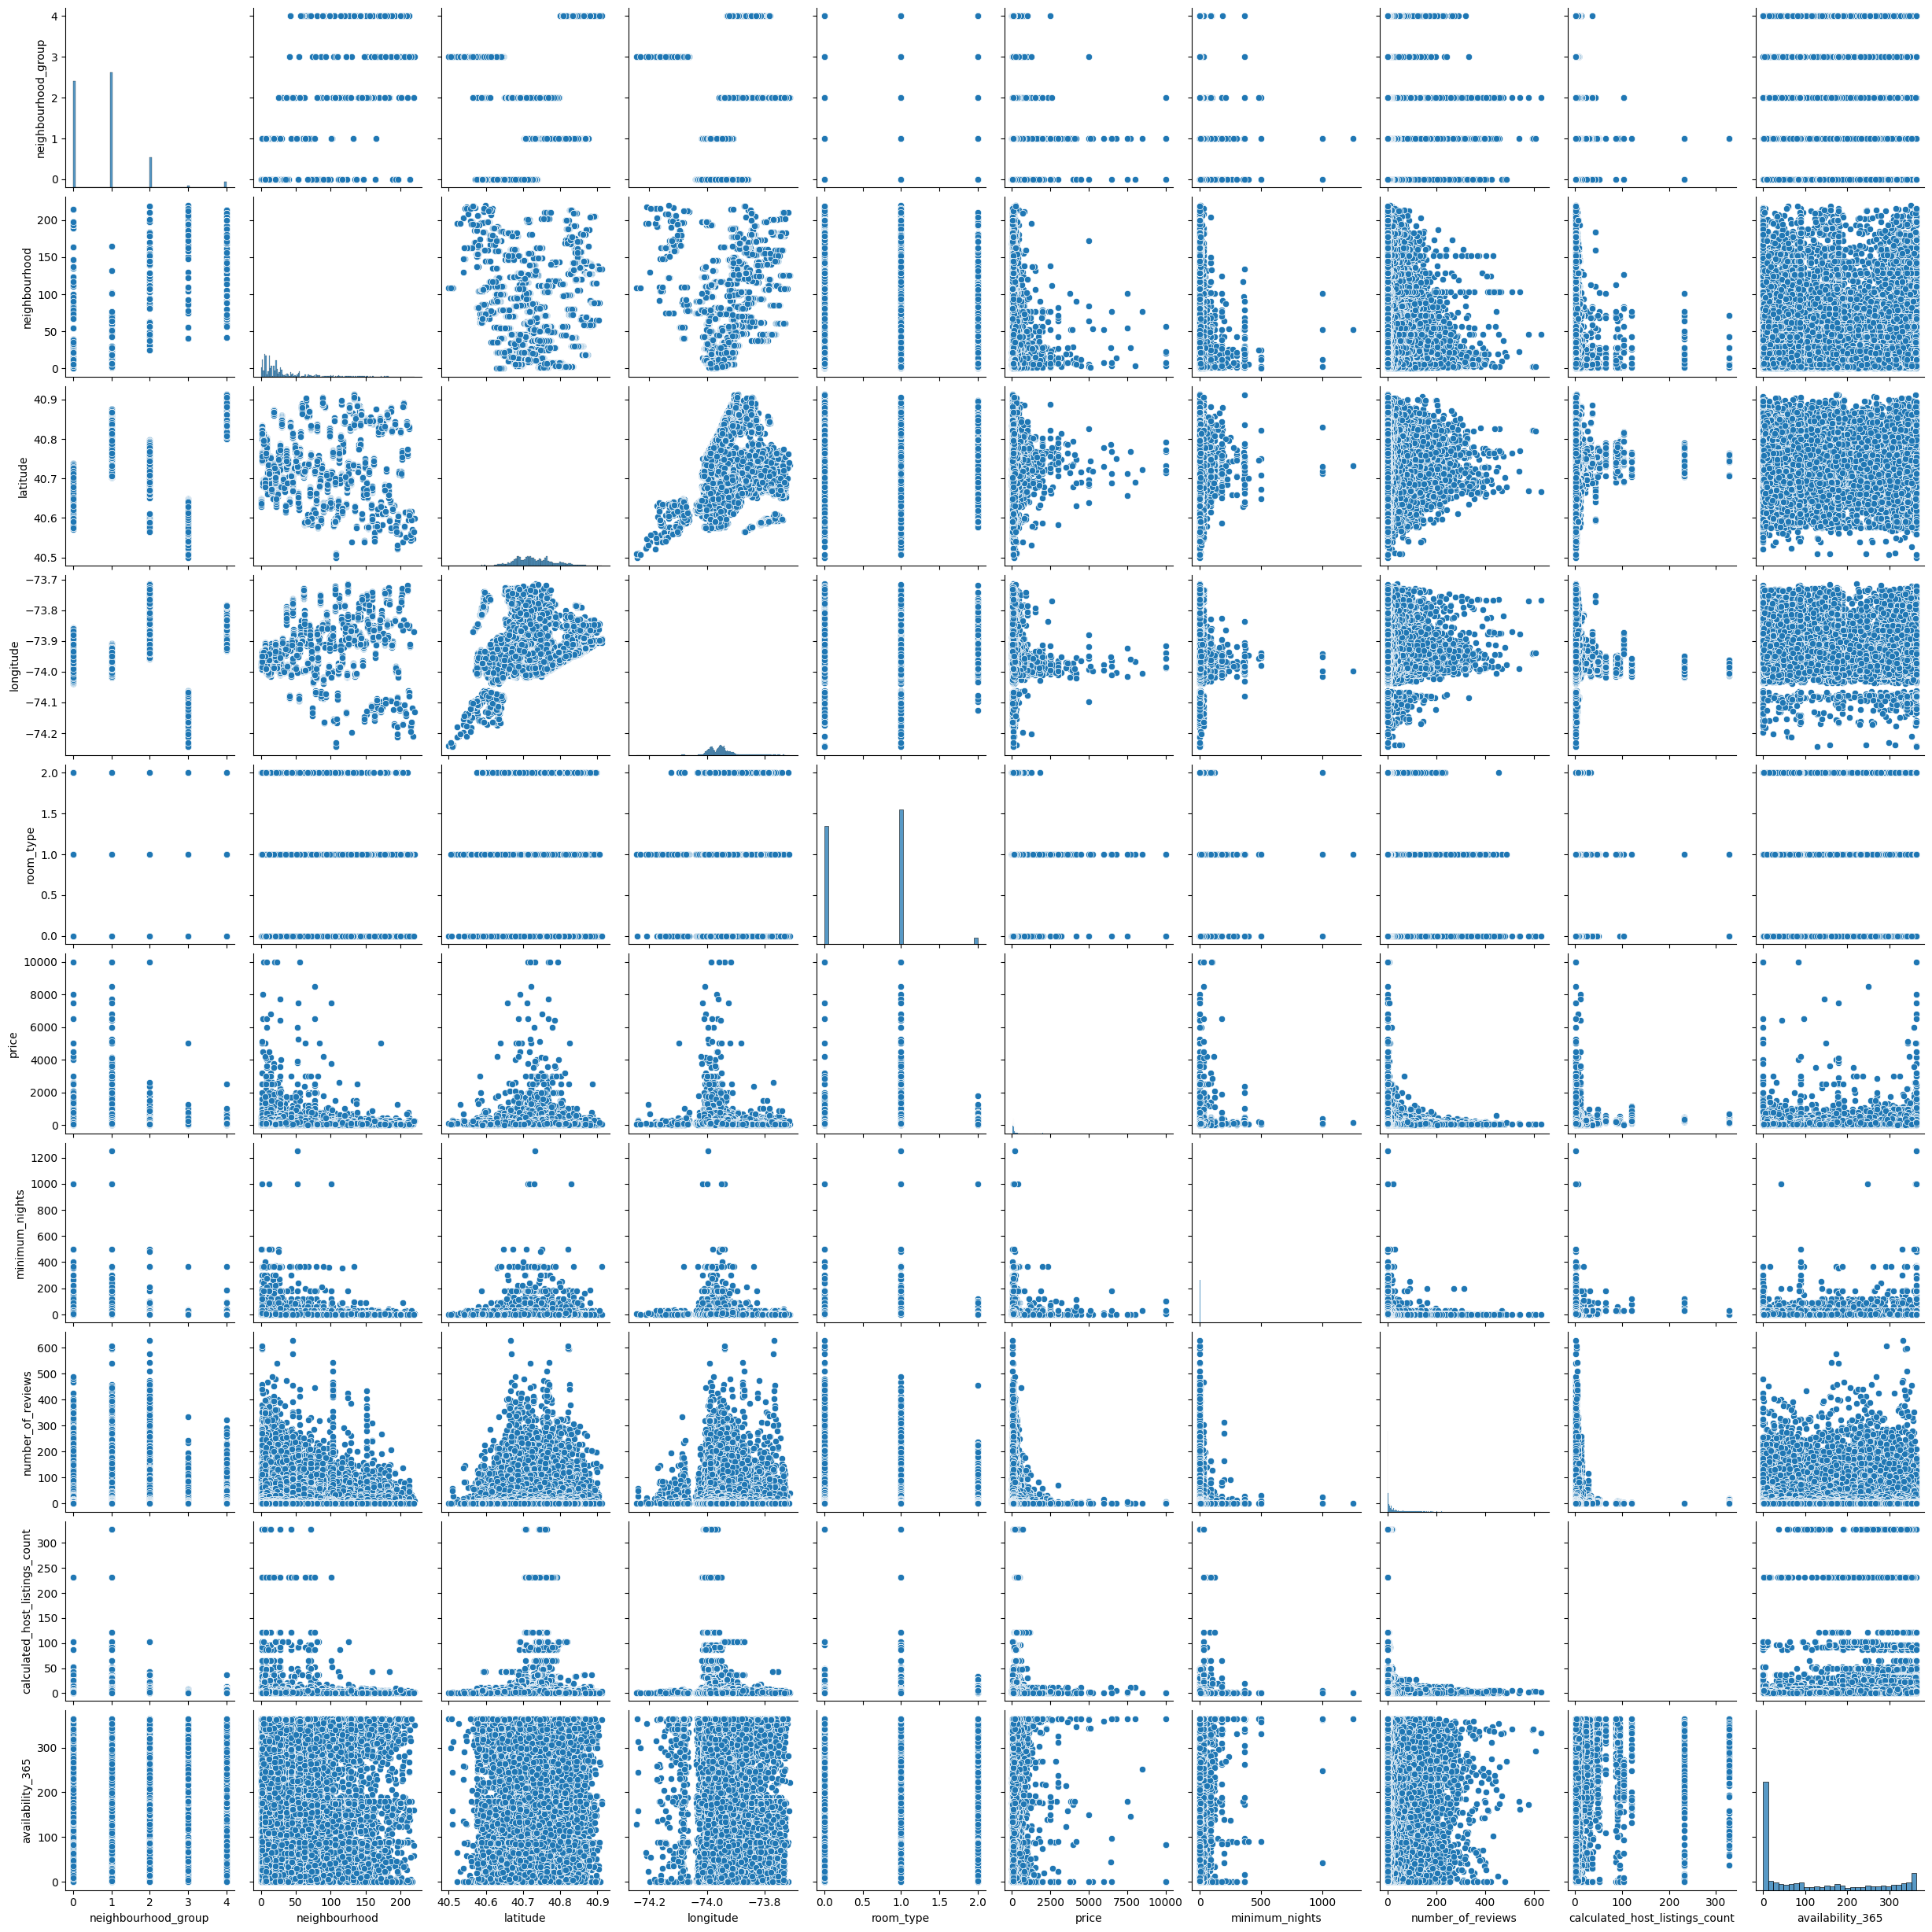

In [20]:
sns.pairplot(data=df)

In [21]:
#Paso 5: Ingeniería de características
#Realizamos un analisis descriptivo, utilizando la funcion describe() para ver rapidamente si se detectan a simple vista algun outlier en cada columna a analizar.
#Se utiliza el diagrama de cajas para ver valores atipicos

df.describe()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


<Axes: ylabel='availability_365'>

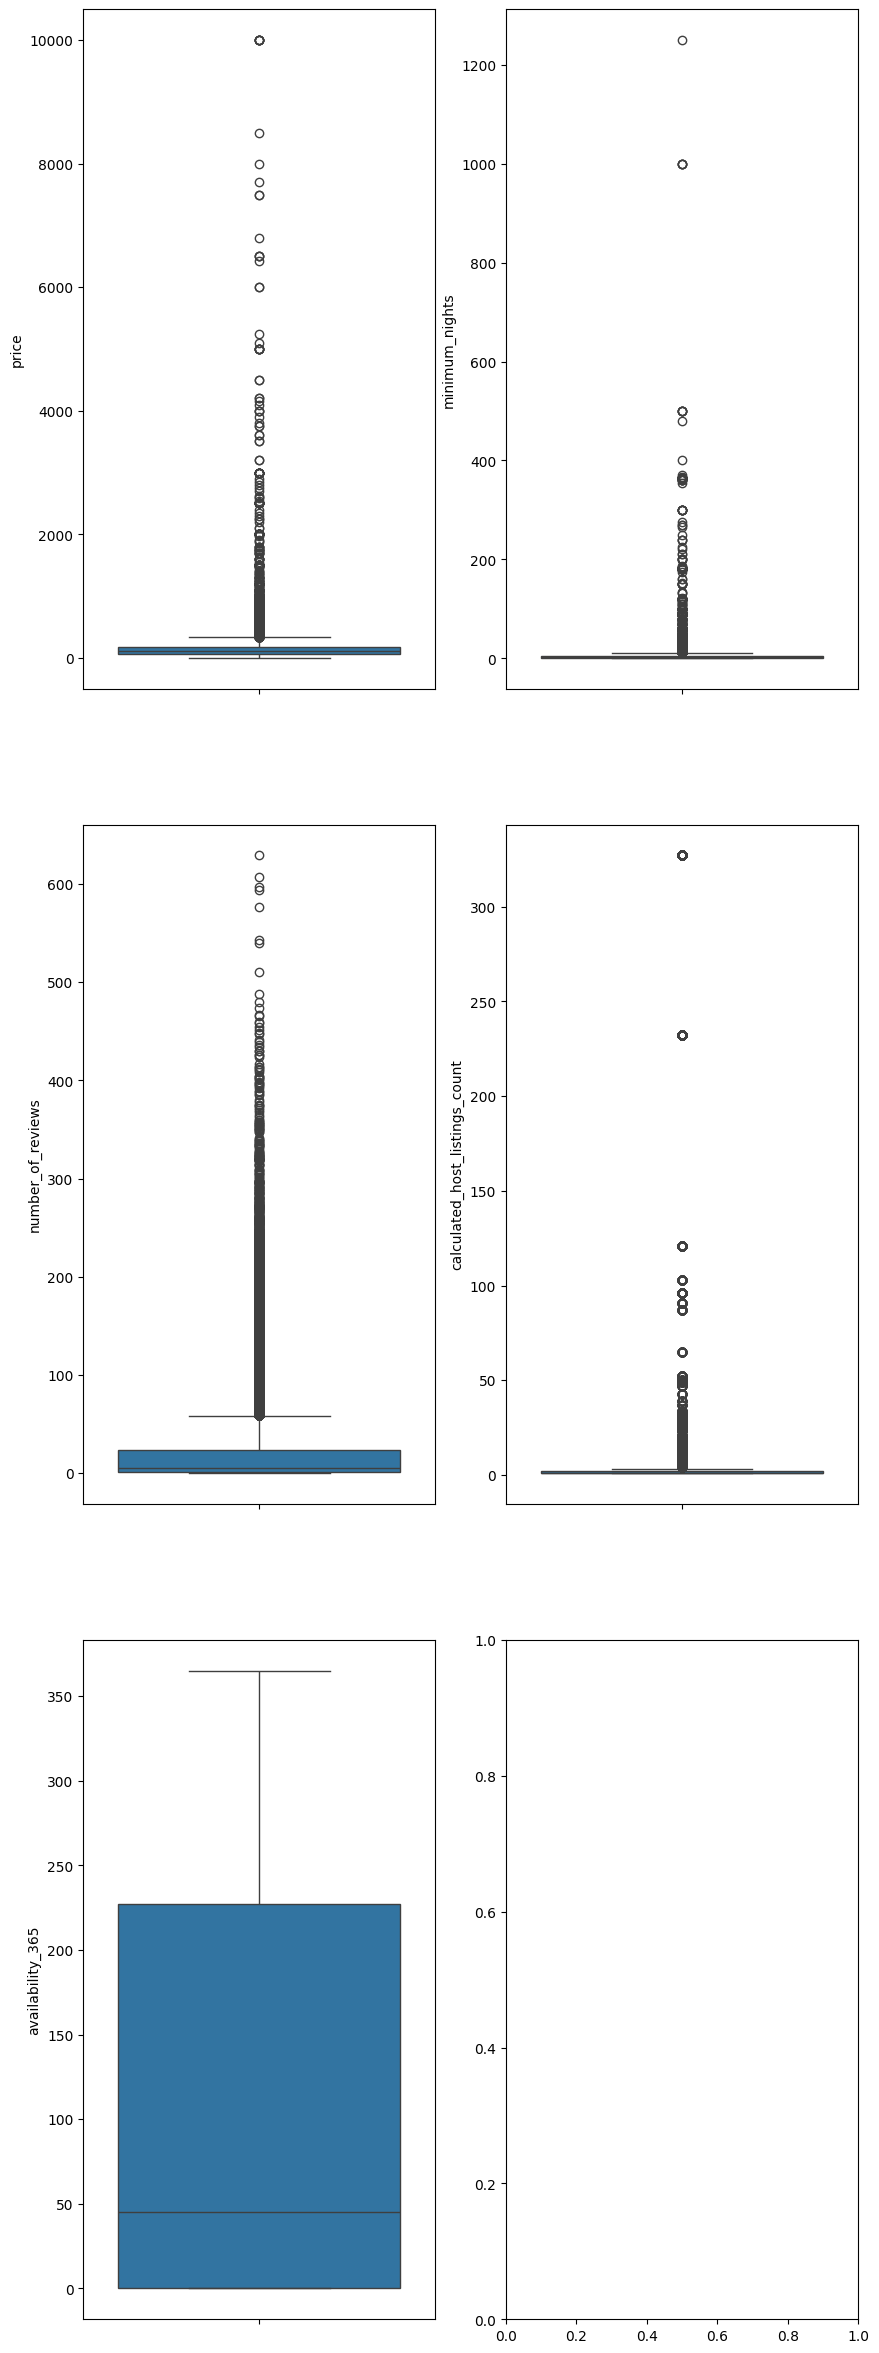

In [22]:
#grafico de cajas. es importante revisar e intepretar cada grafico y detectar anomalias

fig,axes =plt.subplots(3,2,figsize=(10,30))

sns.boxplot(ax=axes[0,0],data = df, y = 'price')
sns.boxplot(ax=axes[0,1],data = df, y = 'minimum_nights')
sns.boxplot(ax=axes[1,0],data = df, y = 'number_of_reviews')
sns.boxplot(ax=axes[1,1],data = df, y = 'calculated_host_listings_count')
sns.boxplot(ax=axes[2,0],data = df, y = 'availability_365')

In [23]:
df = df[df['minimum_nights']<=365]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48881 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48881 non-null  int64  
 1   neighbourhood                   48881 non-null  int64  
 2   latitude                        48881 non-null  float64
 3   longitude                       48881 non-null  float64
 4   room_type                       48881 non-null  int64  
 5   price                           48881 non-null  int64  
 6   minimum_nights                  48881 non-null  int64  
 7   number_of_reviews               48881 non-null  int64  
 8   calculated_host_listings_count  48881 non-null  int64  
 9   availability_365                48881 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 4.1 MB


In [25]:
df = df[df['price']>0]

In [26]:
#Analisis de valores faltantes

df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [27]:
#Escalar variables

from sklearn.preprocessing import MinMaxScaler

variables = ['neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']

scaler = MinMaxScaler()
variables_escaladas = scaler.fit_transform(df[variables])
df_escalado = pd.DataFrame(variables_escaladas,index=df.index,columns=variables)
df_escalado['price'] = df['price']
df_escalado.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0.00,0.000000,0.0,149,0.000000,0.014308,0.015337,1.000000
1,0.25,0.004545,0.5,225,0.000000,0.071542,0.003067,0.972603
2,0.25,0.009091,0.0,150,0.005495,0.000000,0.000000,1.000000
3,0.00,0.013636,0.5,89,0.000000,0.429253,0.000000,0.531507
4,0.25,0.018182,0.5,80,0.024725,0.014308,0.000000,0.000000


In [28]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_escalado.drop('price',axis=1)
y = df_escalado['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

seleccion = SelectKBest(chi2,k=4)
seleccion.fit(X_train,y_train)
ix = seleccion.get_support()
X_train_sel = pd.DataFrame(seleccion.transform(X_train),columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(seleccion.transform(X_test),columns=X_test.columns.values[ix])

X_train_sel.head()

,neighbourhood,room_type,calculated_host_listings_count,availability_365
0,0.645455,0.0,0.0,0.980822
1,0.127273,0.0,0.0,0.000000
2,0.068182,0.5,0.0,0.602740
3,0.100000,0.5,0.0,0.260274
4,0.009091,0.0,0.0,0.000000


In [29]:
X_test_sel['price'] = list(y_test)
X_train_sel['price'] = list(y_train)
X_test_sel.to_csv('../data/processed/clean_test.csv',index = False)
X_train_sel.to_csv('../data/processed/clean_train.csv',index = False)